# Cloud Inpainting

This example shows the use of cloudy to generate a cloud from an incomplete grid. The forward model considers a mask for both, reference volume $v$ and sampled one, i.e.: $y=\mathcal{M} \otimes v$, $\mathcal{A}(\hat{x})=\mathcal{M} \otimes \hat{x}$.

In [1]:
try:  # install all dependencies in colab 
    import google.colab
    !sudo apt-get update -y
    !sudo apt-get install -y libnvidia-gl-555 vulkan-tools glslang-tools vulkan-validationlayers-dev
    !pip install git+https://github.com/rendervous/cloudy_project.git
except:
    print("Executing locally")

Executing locally


Similarly to previous tutorials, we will import required modules and load a reference volume.

/home/leonard/rendervous.project/rdv_env/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Rendering captures: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


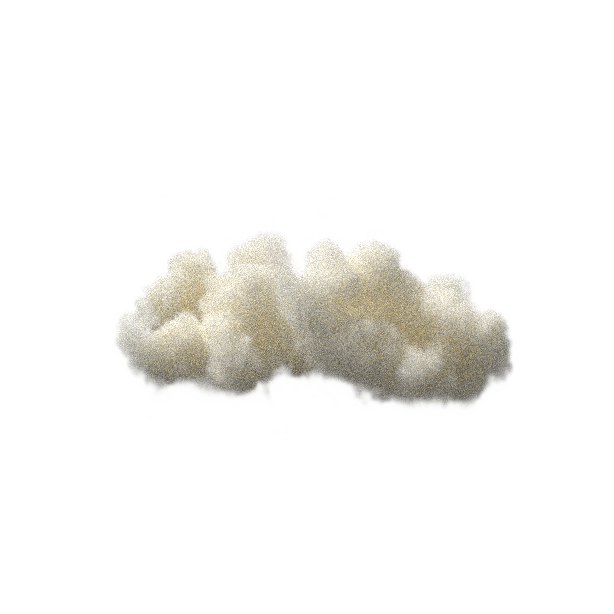

In [2]:
import cloudy
import torch


pipeline = cloudy.create_pipeline('./test')
pipeline.download_pretrained()  # Comment if it is already downloaded
recorder = pipeline.create_recorder()
ref_latent = pipeline.get_test_latent(8)
ref_grid = pipeline.decode_latent(ref_latent)
ref_grid = pipeline.clean_volume(ref_grid)
recorder.new_keyframe(recorder.add_capture_volume(ref_grid, samples=32))
recorder.show_clip(1)

For this example we will consider a mask considering only a half of the volume.

In [3]:
mask = torch.ones_like(ref_grid)
mask[:mask.shape[0]//2] = 0.0  # clear a half
masked_grid = ref_grid * mask

Let's take a look...

Rendering captures: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


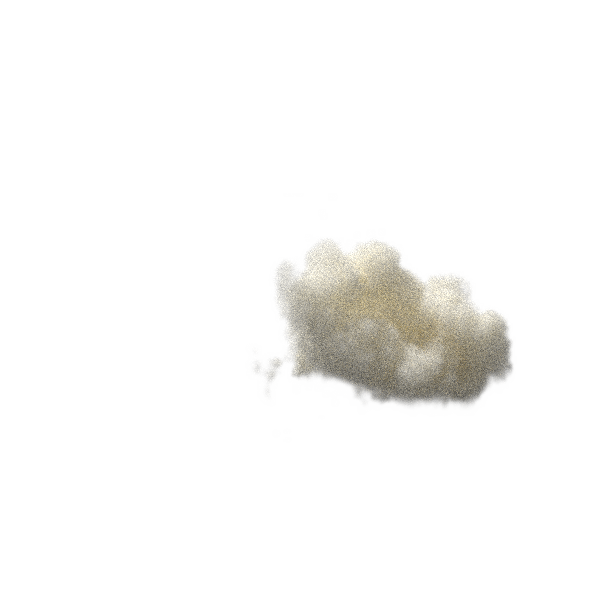

In [4]:
recorder.new_keyframe(recorder.add_capture_volume(masked_grid, samples=32))
recorder.show_clip(1)

Generating now a sample from the posterior distribution.

Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda


Rendering captures: 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


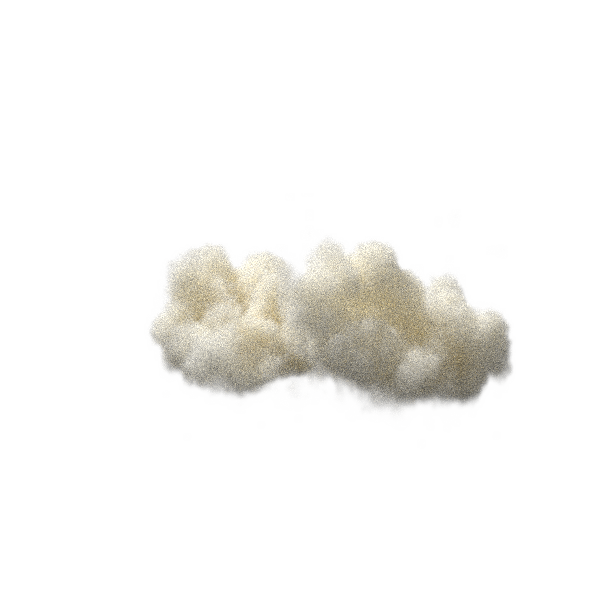

In [5]:
grid = pipeline.sample_volume(
    samples=100,
    y=masked_grid,
    A=lambda v: v*mask
)

recorder.new_keyframe(recorder.add_capture_volume(grid, samples=32))
recorder.show_clip(1)

The posterior samples might vary but always matching the masked region.

Rendering captures: 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]


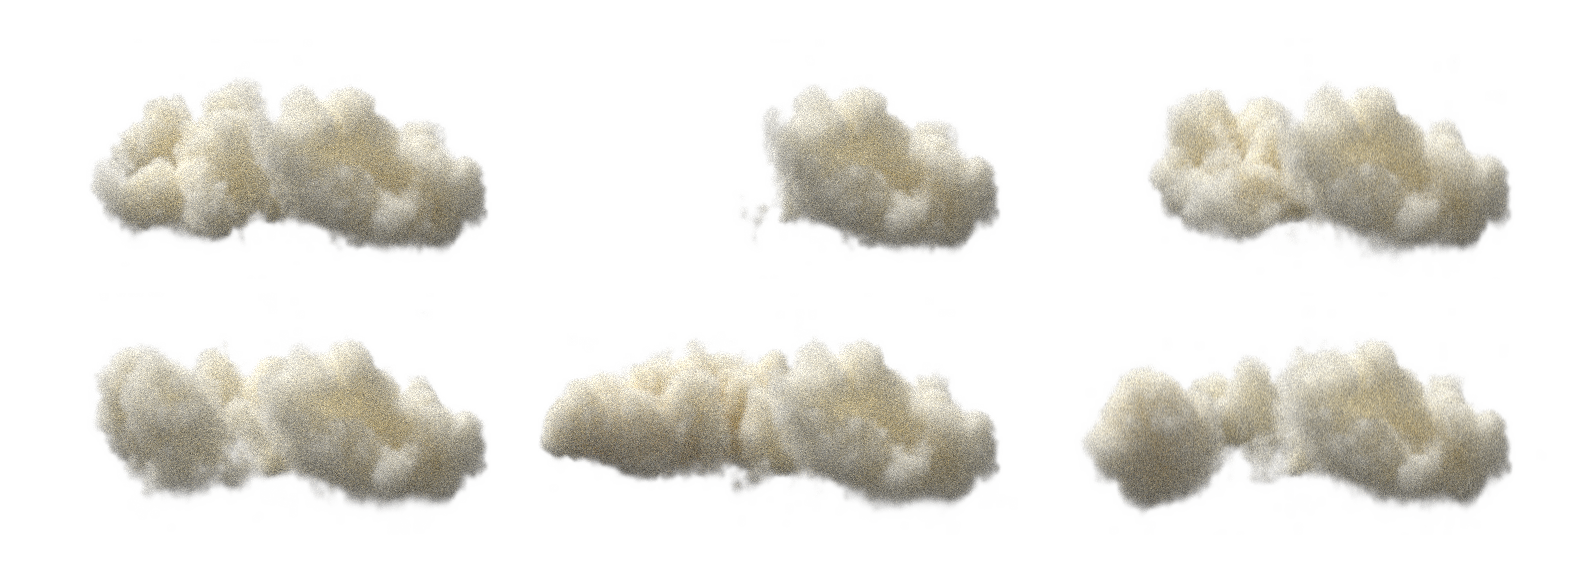

In [6]:
for _ in range(3):
    grid = pipeline.sample_volume(
        samples=100,
        y=masked_grid,
        A=lambda v: v*mask
    )
    
    recorder.new_keyframe(recorder.add_capture_volume(grid, samples=32))

recorder.show_clip(3, 2, width=512, height = 256)